<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Distributions

Il existe de nombreuses façons d'afficher les distributions d'une feature/caractéristique. Dans ce notebook, nous explorons 3 diagrammes pour afficher une distribution : le rugplot, le distplot (histogramme) et le kdeplot.



-----

**NOTE IMPORTANTE !**

**NE VOUS INQUIÉTEZ PAS SI LE STYLE DE VOS DIAGRAMMES APPARAÎT LÉGÈREMENT DIFFÉRENT, NOUS VOUS MONTRERONS COMMENT MODIFIER LA COULEUR ET LE STYLE DES DIAGRAMMES PLUS TARD !**

---

## Données

Nous allons utiliser des données générées par : http://roycekimmons.com/tools/generated_data



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("dm_office_sales.csv")

In [ ]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


## Rugplot

Tracé très simple qui indique un repère par point de données. Ce diagramme nécessite que le tableau unique soit transmis directement. Nous ne l'utiliserons pas souvent car ce n'est pas très clair pour les grands ensembles de données.

In [ ]:
import seaborn as sns

In [ ]:
sns.dis

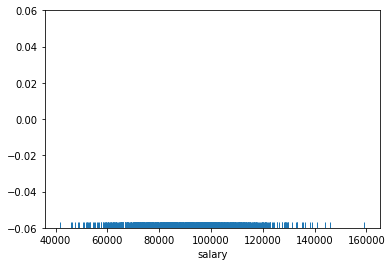

In [ ]:
# L'axe Y ne représente vraiment rien
# L'axe X n'est qu'un bâton par point de données
sns.rugplot(x='salary',data=df)

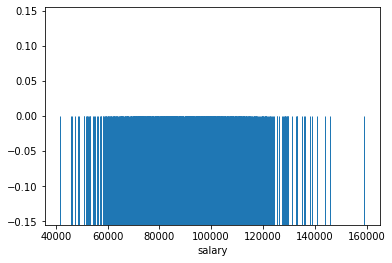

In [ ]:
sns.rugplot(x='salary',data=df,height=0.5)

## displot() et histplot()  
Le "rugplot" en lui-même n'est pas très instructif pour la distribution d'ensembles de données plus importants autour de la moyenne, car tant de traits ou ticks rendent difficile de distinguer un trait d'un autre. Au lieu de cela, nous devrions compter le nombre de graduations par segment de l'axe des x, puis construire un histogramme à partir de cela.

Le "distplot" est un type de tracé qui peut afficher la distribution d'une seule feature/caractéristique. Il s'agit d'un histogramme avec la possibilité d'ajouter un graphique « KDE » (Kernel Density Estimation = estimation de la densité du noyau) au-dessus de l'histogramme. 

Explorons ses cas d'utilisation et sa syntaxe.

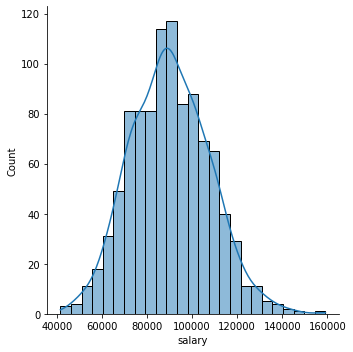

In [ ]:
sns.displot(data=df,x='salary',kde=True)

### Focus sur les Histogrammes

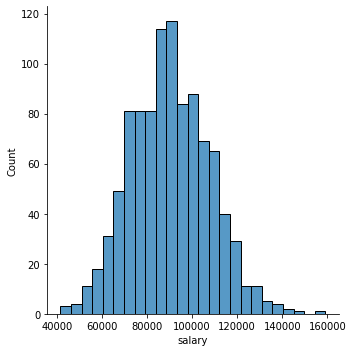

In [ ]:
sns.displot(data=df,x='salary')

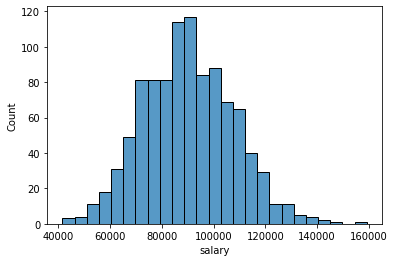

In [ ]:
sns.histplot(data=df,x='salary')

### Nombre de bandes/barres

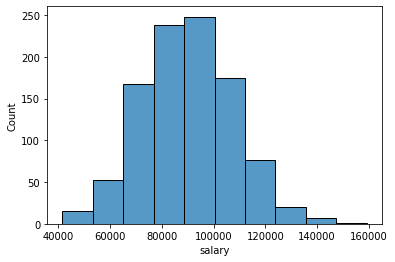

In [ ]:
sns.histplot(data=df,x='salary',bins=10)

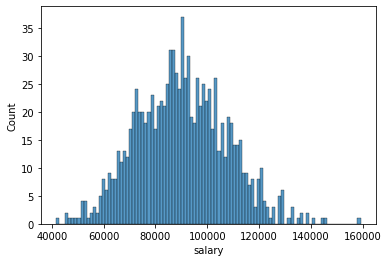

In [ ]:
sns.histplot(data=df,x='salary',bins=100)

### Ajout d'une grille et de styles

Vous pouvez rétablir un style par défaut différent : {darkgrid, whitegrid, dark, white, ticks}.

Dans une leçon ultérieure, nous aborderons le style personnalisé de manière beaucoup plus détaillée.

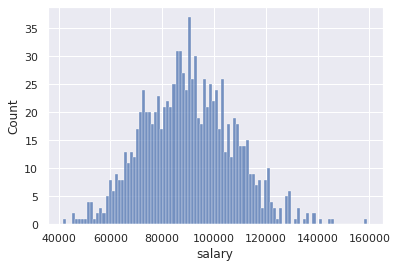

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=df,x='salary',bins=100)

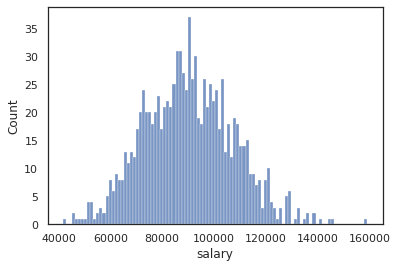

In [ ]:
sns.set(style='white')
sns.histplot(data=df,x='salary',bins=100)

### Ajout de mots-clés à partir des tracés de matplotlib

Seaborn peut accepter des arguments de mots-clés directement à partir du code Matplotlib utilisé par Seaborn. Gardez à l'esprit que tous les tracés de Seaborn ne peuvent pas accepter tous les arguments Matplotlib, mais les principaux paramètres de style dont nous avons parlé sont disponibles.

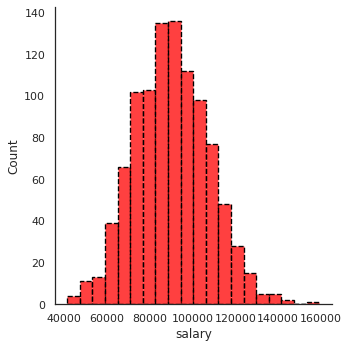

In [ ]:
sns.displot(data=df,x='salary',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

## KDE : Le diagramme d'estimation de la densité du noyau

**Note : consultez la vidéo pour obtenir des explications détaillées complètes.**

Le graphique de KDE représente une estimation de la fonction de **densité** de probabilité d'une variable aléatoire. L'estimation de la densité du noyau est un problème fondamental de lissage des données dans lequel des inférences sur la population sont faites, sur la base d'un échantillon de données finies.

Construisons un exemple simple :

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)

# randint doit être uniforme, chaque âge a la même chance d'être choisi
# note : en réalité, les âges ne sont presque jamais répartis uniformément, mais ce n'est qu'un exemple
sample_ages = np.random.randint(0,100,200)

In [ ]:
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [ ]:
sample_ages = pd.DataFrame(sample_ages,columns=["age"])

In [ ]:
sample_ages.head()

,age
0,51
1,92
2,14
3,71
4,60


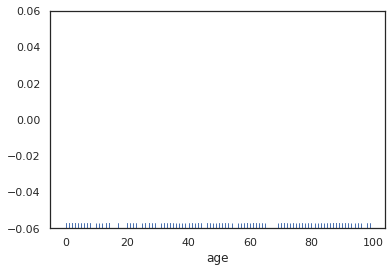

In [ ]:
sns.rugplot(data=sample_ages,x='age')

<Figure size 864x576 with 0 Axes>

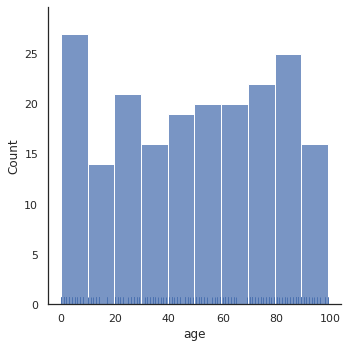

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages,x='age',bins=10,rug=True)

<Figure size 864x576 with 0 Axes>

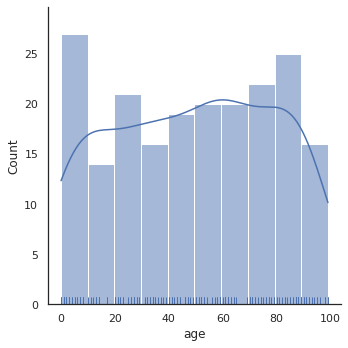

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages,x='age',bins=10,rug=True,kde=True)

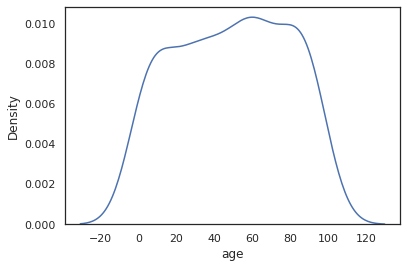

In [ ]:
sns.kdeplot(data=sample_ages,x='age')

### Découpe du KDE

Nous pourrions restreindre le KDE si nous savons que nos données ont des limites strictes (personne ne peut avoir un âge négatif et personne dans la population ne peut avoir plus de 100 ans pour une raison quelconque)

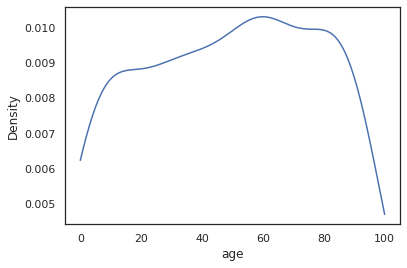

In [ ]:
# plt.figure(figsize=(12,8))
sns.kdeplot(data=sample_ages,x='age',clip=[0,100])

### Bande passante

Comme expliqué dans la vidéo, le KDE (estimation de la densité d'une distribution) est construit à partir de la somme du noyau (le plus souvent gaussien), nous pouvons agir sur la bande passante de ce noyau pour rendre le KDE plus « sensible » aux données. Remarquez qu'avec une bande passante plus petite, les noyaux ne s'étendent pas aussi largement, ce qui signifie que nous n'avons plus besoin de la coupure. Cela est analogue à l'augmentation du nombre de bandes dans un histogramme (ce qui rend les bandes réelles plus étroites).

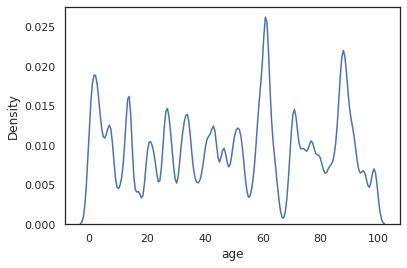

In [ ]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.1)

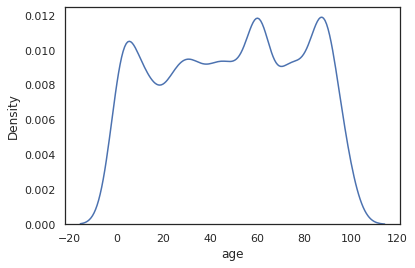

In [ ]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5)

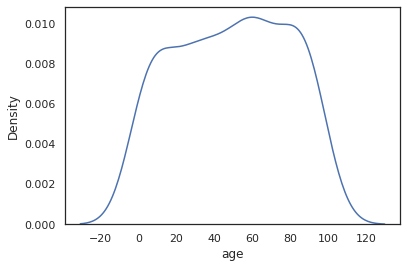

In [ ]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=1)

### Style de base

Il y a quelques appels de style de base directement disponibles dans un KDE.

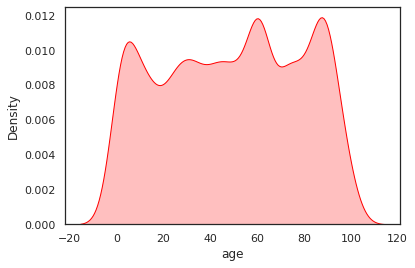

In [ ]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5,shade=True,color='red')

### Tracés KDE bi-dimensionnels

Nous les aborderons plus en détail ultérieurement, mais gardez à l'esprit que vous pouvez comparer deux variables continues et créer un diagramme KDE 2D montrant les distributions avec le même appel à kdeplot(). Ne vous préoccupez pas de ce sujet maintenant, car nous l'aborderons plus en détail plus tard lorsque nous parlerons de comparer 2 features/variables l'une contre l'autre dans un appel de plot().

In [ ]:
random_data = pd.DataFrame(np.random.normal(0,1,size=(100,2)),columns=['x','y'])

In [ ]:
random_data

,x,y
0,-1.415371,-0.420645
1,-0.342715,-0.802277
2,-0.161286,0.404051
3,1.886186,0.174578
4,0.257550,-0.074446
...,...,...
95,-0.208122,-0.493001
96,-0.589365,0.849602
97,0.357015,-0.692910
98,0.899600,0.307300


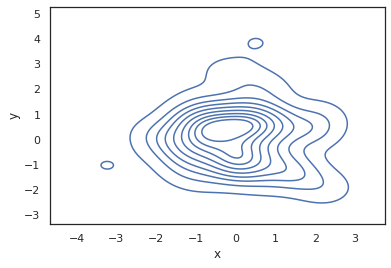

In [ ]:
sns.kdeplot(data=random_data,x='x',y='y')

### Code bonus pour les visualisations de la leçon vidéo

Vous trouverez ci-dessous le code utilisé pour créer les visualisations présentées dans la vidéo pour une explication d'un tracé KDE. Nous n'aborderons pas ce code plus en détail, puisqu'il n'a été utilisé que pour la création des slides présentées dans la vidéo.

In [ ]:
from scipy import stats

**Données**

In [ ]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

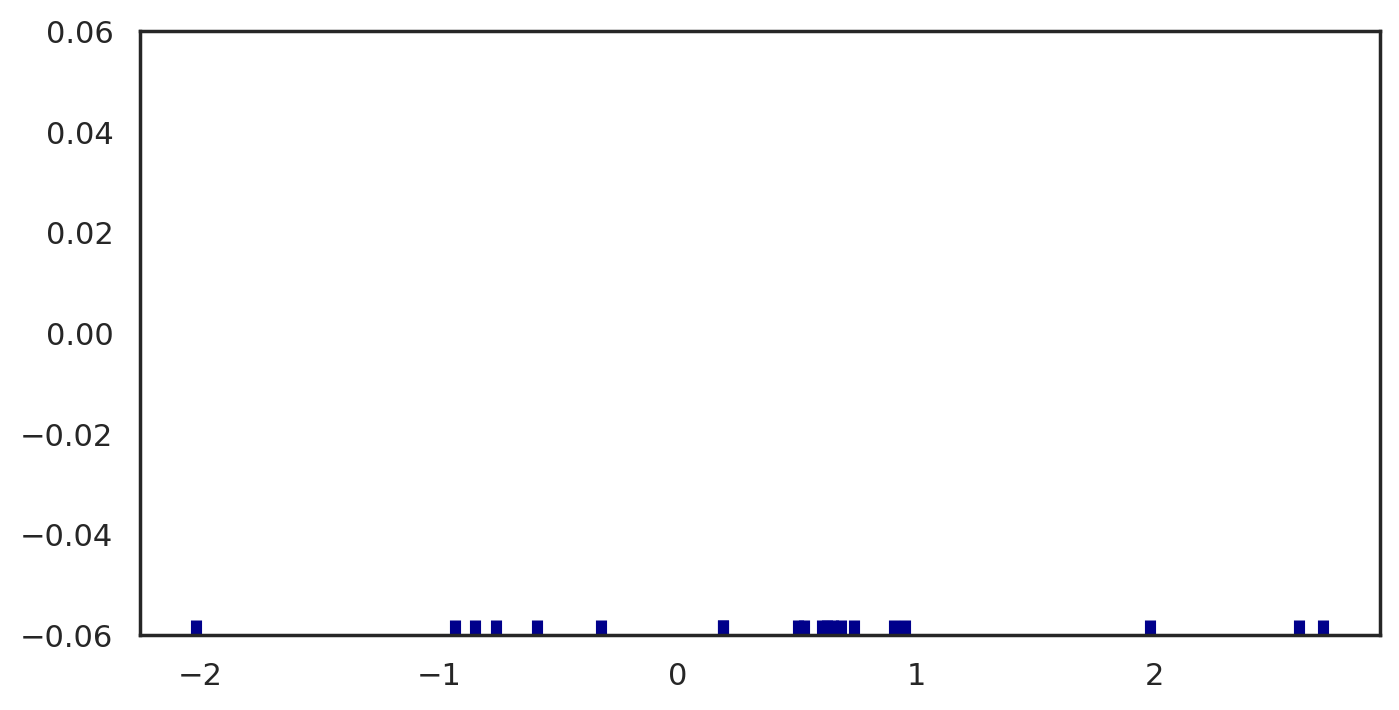

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="darkblue", linewidth=4)

<Figure size 1600x800 with 0 Axes>

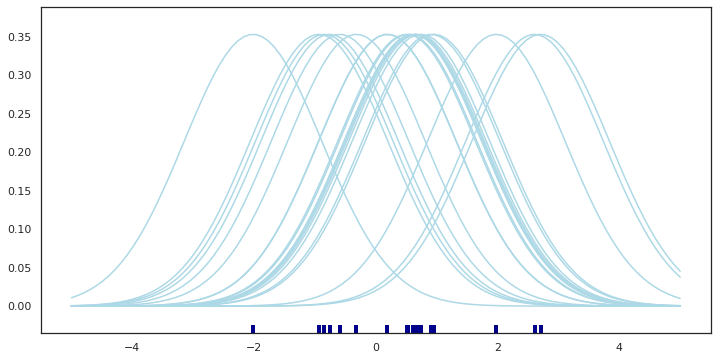

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

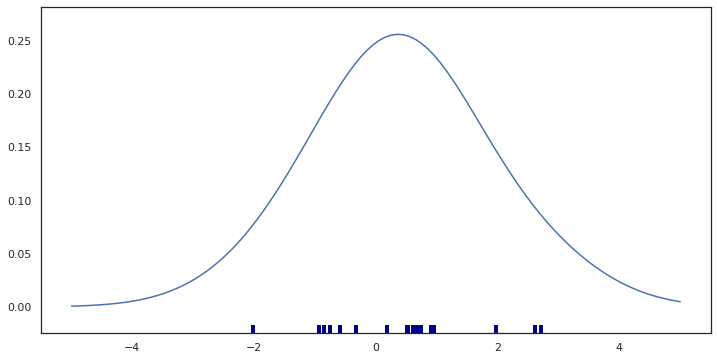

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
from scipy.integrate import trapz
plt.figure(figsize=(12,6))
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

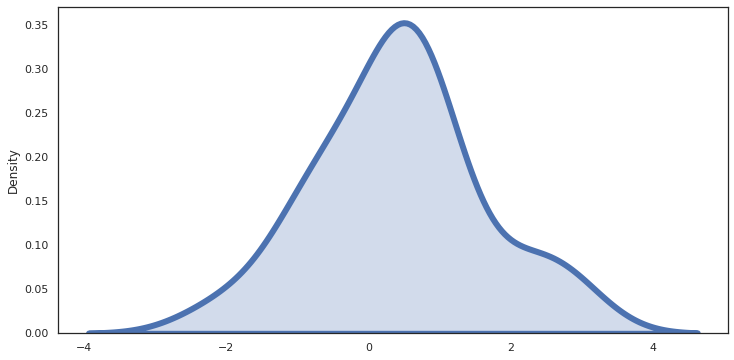

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
#     plt.plot(support, kernel, color="lightblue")

# sns.rugplot(x, color="darkblue", linewidth=4);
sns.kdeplot(x,linewidth=6,shade=True)